<a href="https://colab.research.google.com/github/EternalSorrrow/transformer-feedforward-kernel/blob/main/bpe_classification_setup_simple_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Nov 22 13:49:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/google-research/long-range-arena.git

Cloning into 'long-range-arena'...
remote: Enumerating objects: 474, done.
remote: Counting objects: 100% (474/474), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 474 (delta 330), reused 418 (delta 278), pack-reused 0
Receiving objects: 100% (474/474), 153.25 KiB | 1.03 MiB/s, done.
Resolving deltas: 100% (330/330), done.


In [ ]:
#Execute if A100 is the current GPU

!pip3 install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 121.3 MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x560a09db6000 @  0x7fba8ae74615 0x5609d00b54cc 0x5609d019547a 0x5609d00b82ed 0x5609d01a9e1d 0x5609d012be99 0x5609d01269ee 0x5609d00b9bda 0x5609d012bd00 0x5609d01269ee 0x5609d00b9bda 0x5609d0128737 0x5609d01aac66 0x5609d0127daf 0x5609d01aac66 0x5609d0127daf 0x5609d01aac66 0x5609d0127daf 0x5609d00ba039 0x5609d00fd409 0x5609d00b8c52 0x5609d012bc25 0x5609d01269ee 0x5609d00b9bda 0x5609d0128737 0x5609d01269ee 0x5609d00b9bda 0x5609d0127915 0x5609d00b9afa 0x5609d0127c0d 0x5609d01269ee
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:13:55tcmalloc: large alloc 1434370048 bytes == 0x560a4e40c000 @  0x7fba8ae74615 0x5609d00b54cc 0x5609d019547a 0x5609d00b82ed 0x5609d01a9e1d 0x5609d012be99 0x5609d01269ee 0x5609d00b9bda 0x5609d012bd00 0x5609d01269ee 0x5609d00b9bda 0x5609d0128737 0x5609d01aac66 0x5609d012

In [ ]:
%cd /content/long-range-arena

import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

from lra_benchmarks.text_classification.input_pipeline import get_tc_datasets

batch_size=16
accumulation_steps=32 // batch_size
max_length=4000

train_dataset, valid_dataset, test_dataset, encoder = get_tc_datasets(1, 'imdb_reviews', batch_size=batch_size, max_length=max_length)

/content/long-range-arena


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete4094YJ/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete4094YJ/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete4094YJ/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
INFO:tensorflow:Finished preprocessing


INFO:tensorflow:Finished preprocessing


INFO:tensorflow:<MapDataset shapes: {Source: (), Target: ()}, types: {Source: tf.string, Target: tf.int64}>


INFO:tensorflow:<MapDataset shapes: {Source: (), Target: ()}, types: {Source: tf.string, Target: tf.int64}>


In [ ]:
sample = next(iter(train_dataset))['inputs']

for i in range(min(4, batch_size)):
  print(encoder.decode(sample[i]))

Let me make one thing clear.for the most part, the mentality of those who run the show in Hollywood frankly p*sses me right off in general and even more specifically in relation to its treatment of much loved, iconic characters from the pages of comic books. Why? Well let's take a typical Hollywood executive board meeting scenario to illustrate shall we..<br /><br />Executive no.1 'Hey there's lots of dollars to be gleaned from superhero flicks these days.' <br /><br />Executive no.2 'Good point, let's make one with haste then!  We'll do a lucky dip in a hat and pick out a superhero at random to base a film upon!' (The dip takes place and a famous superheroes name is pulled out) <br /><br />Executive no.1 'Great! Now who can we get to play the part?' <br /><br />Executive no.2 'Who's a big box office star at the moment?' <br /><br />Executive no.1 '*name of big actor* is the in thing this week.' <br /><br />Executive no.2 'But does he really suit the role? I mean he doesn't resemble

In [ ]:
import torch.nn as nn
import math

LAMBDA = 0.1

class TEmbedding(nn.Module):
  def __init__(self, num_embeddings, hidden_dim, seq_length=1024, padding_idx=0):
    super(TEmbedding, self).__init__()
    
    self.num_embeddings = num_embeddings
    self.hidden_dim=hidden_dim
    self.seq_length = seq_length
    self.padding_idx = padding_idx

    self.embedding = nn.Embedding(num_embeddings, hidden_dim, padding_idx)
    self.pos_embeds  = nn.Parameter(torch.zeros(1, self.seq_length, self.hidden_dim))

    self.cls = nn.Parameter(torch.zeros(1, 1, self.hidden_dim)) #!!!!!!! INIT WITH ANOTHER VALUE IF REQUIRED

  def forward(self, input):
    batch_size, seq_len = input.shape
    
    embed = self.embedding(input)
    embed = embed + self.pos_embeds
    embed = torch.cat([ self.cls.expand(batch_size, 1, -1), embed ], axis=1)

    return embed

class TAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(TAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   =qkv_dim
    self.num_heads =num_heads
    
    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads

    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

    self.dropout = nn.Dropout(dropout_rate)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v)
    q = torch.mul(q, 1. / torch.sqrt(torch.tensor(self.qkv_dim)))

    qk = torch.matmul(q, k.transpose(-1, -2))
    qk = nn.Softmax(dim=-1)(qk)

    def assertion_function(tsr):
      tsr = torch.sum(tsr, axis=-1)
      tsr = tsr - torch.ones_like(tsr)
      return torch.max(torch.abs(tsr)) < 1e-5

    assert assertion_function(qk)

    qk = self.dropout(qk) #Like in TF implementation; could be done before Softmax by random -inf addition

    out = torch.matmul(qk, v)
    out = out.permute(0, 2, 1, 3)

    new_shape = out.shape[:-2] + (self.qkv_dim,)

    out = out.reshape(* new_shape)

    out = self.lin(out)

    return out

class HWLinear(nn.Module):
  def __init__(self, num_heads, input_dim, output_dim, use_bias):
    super(HWLinear, self).__init__()
    
    self.use_bias = use_bias
    if use_bias:
      self.bias   = nn.Parameter(torch.zeros( (1, num_heads, 1, output_dim)))

    self.weight = nn.Parameter(torch.empty( (num_heads, input_dim, output_dim)))

    def he_init(m):
      s =  np.sqrt( 2. / input_dim )
      m.data.normal_(0, s)

    he_init(self.weight)

  def forward(self, x):
    x = torch.matmul(x, self.weight)
    if self.use_bias:
      x += self.bias
    return x

class Lambda(nn.Module):
  def __init__(self, lambda_, objects=None):
      super(Lambda, self).__init__()
      self.lambda_ = lambda_
      self.objects = objects

  def forward(self, x):
    if self.objects is not None:
      return self.lambda_(self.objects, x)
    return self.lambda_(x)

class LKAAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(LKAAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   = qkv_dim
    self.num_heads =num_heads

    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads
    
    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    #self.lka = nn.Sequential(
    #  nn.Linear(self.head_dim, self.head_dim), nn.GELU(),
    #  nn.Linear(self.head_dim, self.head_dim), nn.Softplus(beta=2.5),
    #)

    #256, 4, 16, 1024
    #256, 64, 1, 1024
    class AMGOLU(nn.Module):
      def __init__(self, num_heads, qkv_dim, gate_rank, dropout_rate, gate_nonlinearity, kernel_nonlinearity, use_bias=False):
        super(AMGOLU, self).__init__()

        self.head_dim = qkv_dim // num_heads
        self.num_heads= num_heads
        
        self.orth_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)
        self.orth_weight.weight = nn.Parameter(torch.stack([ nn.init.orthogonal_(torch.empty((self.head_dim, self.head_dim))) for _ in range(num_heads) ], dim=0))

        self.gate_weight_a = HWLinear(num_heads, self.head_dim, gate_rank, use_bias)
        self.gate_weight_b = HWLinear(num_heads, gate_rank, self.head_dim, use_bias)

        self.kernel_nonlinearity = kernel_nonlinearity
        self.gate_nonlinearity   = gate_nonlinearity

        self.dropout = nn.Dropout(dropout_rate)

      def forward(self, x):
        x, losses = x
        x = self.dropout(x)

        forward_info = self.orth_weight(x)
        forward_info = self.kernel_nonlinearity(forward_info)

        gate_info = self.gate_weight_a(x)
        gate_info = self.gate_weight_b(gate_info)
        gate_info = self.gate_nonlinearity(gate_info)

        x = forward_info * gate_info
        
        loss = torch.eye(self.head_dim, device=self.orth_weight.weight.device).unsqueeze(0).expand(self.num_heads, -1, -1)
        loss = nn.MSELoss()(torch.matmul(self.orth_weight.weight, self.orth_weight.weight.transpose(-1, -2)), loss)
        loss *= LAMBDA

        losses.append(loss)

        return x, losses

    class GatedOrthoKernel(nn.Module):
      def __init__(self, num_heads, qkv_dim, dropout_rate=0.1, gate_nonlinearity=nn.Sigmoid(), kernel_nonlinearity=nn.Identity(), use_bias=False):
        super(GatedOrthoKernel, self).__init__()

        self.head_dim = qkv_dim // num_heads
        self.num_heads = num_heads

        self.orth_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)
        self.orth_weight.weight = nn.Parameter(torch.stack([ nn.init.orthogonal_(torch.empty((self.head_dim, self.head_dim))) for _ in range(num_heads) ], dim=0))
        self.gate_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)

        self.kernel_nonlinearity = kernel_nonlinearity
        self.gate_nonlinearity   = gate_nonlinearity

        self.dropout = nn.Dropout(dropout_rate)

      def forward(self, x):
        x, losses = x
        x = self.dropout(x)

        x = self.kernel_nonlinearity(self.orth_weight(x)) * self.gate_nonlinearity(self.gate_weight(x))
        
        loss = torch.eye(self.head_dim, device=self.orth_weight.weight.device).unsqueeze(0).expand(self.num_heads, -1, -1)
        loss = nn.MSELoss()(torch.matmul(self.orth_weight.weight, self.orth_weight.weight.transpose(-1, -2)), loss)
        loss *= LAMBDA

        losses.append(loss)

        return x, losses


    class HeadWiseFF(nn.Module):
      def __init__(self, num_heads, qkv_dim, dropout_rate, nonlinearity=nn.Identity(), use_bias=False, residual=False):
        super(HeadWiseFF, self).__init__()
        
        head_dim = qkv_dim // num_heads

        self.bias   = nn.Parameter(torch.empty( (1, num_heads, 1, head_dim)))
        self.dropout= nn.Dropout(dropout_rate)
        self.use_bias = use_bias

        self.weight = nn.Parameter(torch.empty( (num_heads, head_dim, head_dim)))
        nn.init.kaiming_uniform_(self.weight, a=math.sqrt(5))

        #Orthogonal initialization
        #Workaround with torch.stack, since Torch initializes a tensor as orthgonal by flattening its trailing dims and QR-factorizing the resulting 2d
        
        #self.weight = torch.stack([ nn.init.orthogonal_(torch.empty((head_dim, head_dim))) for _ in range(num_heads) ], dim=0)
        #self.weight = nn.Parameter(self.weight)

        bound = 1 / math.sqrt(head_dim)
        nn.init.uniform_(self.bias, -bound, bound)

        self.nonlinearity = nonlinearity
        self.residual= residual

      def forward(self, x):
        
        x, losses = x

        bs, hd, seq, hdim = x.shape
        y = self.dropout(x)
        y = torch.matmul(y, self.weight) #BS, HD, SEQ, HDIM
        if self.use_bias:
          y += self.bias
        y = self.nonlinearity(y)

        #loss = torch.eye(hdim, device=self.weight.device).unsqueeze(0).expand(* self.weight.shape)
        #loss = nn.MSELoss()(torch.matmul(self.weight, self.weight.transpose(-1, -2)), loss)
        #loss *= LAMBDA

        #losses.append(loss)

        if self.residual:
          return x + y, losses
        return y, losses

    self.lka = nn.Sequential(
        
        #AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        #AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        #AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Softplus(), False),
        
        #HeadWiseFF(self.num_heads, self.qkv_dim, dropout_rate, nn.Softplus(), use_bias=False),
        
        GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Softplus(), False)

        #Lambda(lambda o, x: (o['act'](x[0]), x[1]), { 'act' : nn.Identity() })
        
    )

    self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

    self.dropout = nn.Dropout(dropout_rate)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v)
    #BS x HEADS x SEQ x HEAD_DIM
    
    q, _ = self.lka((q, losses))
    k, _ = self.lka((k, losses)) #Use this for var kernel

    q = q / math.sqrt(self.head_dim)
    k = k / math.sqrt(self.head_dim)

    numerator = torch.matmul(k.unsqueeze(-1), v.unsqueeze(-2))
    numerator = numerator.sum(axis=2)
    numerator = torch.matmul(q, numerator)
    
    denominator = k.sum(axis=2).unsqueeze(-1)
    denominator = q.matmul(denominator)

    out = numerator / denominator
    out = out.permute(0, 2, 1, 3)
    
    #TODO: INSERT DROPOUT
    
    new_shape = out.shape[:-2] + (self.qkv_dim,)
    out = out.reshape(* new_shape)

    out = self.lin(out)

    return out

class SimpleAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(SimpleAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   =qkv_dim
    self.num_heads =num_heads

    assert not qkv_dim % num_heads
    
    self.head_dim =hidden_dim // num_heads
    
    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    self.dropout = nn.Dropout(dropout_rate)
    #self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v) #BS x HEADS x SEQ x HEAD_DIM

    _, _, seq_len, _ = q.shape

    kv = torch.matmul(k.transpose(-1, -2), v)
    kv *= 1 / math.sqrt(seq_len)
    kv = self.dropout(kv)

    out = torch.matmul(q, kv)
    #out *= 1 / math.sqrt(self.qkv_dim)
    out = out.permute(0, 2, 1, 3)
    
    new_shape = out.shape[:-2] + (self.qkv_dim,)
    out = out.reshape(* new_shape)

    #out = self.lin(out)

    return out

class FtAttention(nn.Module):
  def __init__(self, *args, **kwargs):
    super(FtAttention, self).__init__()

  def forward(self, x, losses=[]):
    return torch.fft.fft(torch.fft.fft(x, dim=-1), dim=-2).real

class TBlock(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, mlp_dim, num_heads, dropout_rate):
    super(TBlock, self).__init__()

    self.hidden_dim = hidden_dim
    self.qkv_dim  = qkv_dim
    self.mlp_dim  = mlp_dim

    self.layernorm_input = nn.LayerNorm(hidden_dim, eps=1e-6)
    self.layernorm_inter = nn.LayerNorm(hidden_dim, eps=1e-6)

    self.attention = TAttention(hidden_dim, qkv_dim, num_heads, dropout_rate)

    self.ffn       = nn.Sequential(
        nn.Linear(hidden_dim, mlp_dim), nn.GELU(), nn.Dropout(dropout_rate),
        nn.Linear(mlp_dim, hidden_dim), nn.Dropout(dropout_rate),
    )


  def forward(self, input, losses=[]):
    x = self.layernorm_input(input)
    x = self.attention(x, losses)

    x = input + x

    y = self.layernorm_inter(x)
    x = self.ffn(y) + x

    return x

class TClassifier(nn.Module):
  def __init__(self, classes, hidden_dim, inter_dim, dropout_rate):
    super(TClassifier, self).__init__()

    self.layernorm = nn.LayerNorm(hidden_dim, eps=1e-6)
    self.dropout   = nn.Dropout(dropout_rate)

    self.ffn       = nn.Sequential(
        nn.Linear(hidden_dim, inter_dim), nn.GELU(),
    )
    self.output    = nn.Linear(inter_dim, classes)

  def forward(self, x):
    x = self.layernorm(x)
    x = x[:, 0, :]
    x = self.dropout(x)

    x = self.ffn(x)
    logits = self.output(x)

    return logits

class IEmbedding(nn.Module):
  def __init__(self, resolution, hidden_dim):
    super(IEmbedding, self).__init__()
    
    self.hidden_dim=hidden_dim
    self.seq_length = resolution ** 2
    
    self.embedding = nn.Conv2d(1, hidden_dim, 1)
    self.pos_embeds  = nn.Parameter(torch.zeros(1, self.seq_length, self.hidden_dim))

    self.cls = nn.Parameter(torch.zeros(1, 1, self.hidden_dim)) #!!!!!!! INIT WITH ANOTHER VALUE IF REQUIRED

  def forward(self, input):
    #Expecting the tf-style Torch tensor = BS x H x W x C
    input = input.transpose(1, 3)
    embed = self.embedding(input)
    
    batch_size, channels, height, width = embed.shape
    
    embed = embed.view(batch_size, self.hidden_dim, -1).transpose(-1, -2)
    embed = embed + self.pos_embeds
    embed = torch.cat([ self.cls.expand(batch_size, 1, -1), embed ], axis=1)

    return embed

class Transformer(nn.Module):
  def __init__(self, classes, num_embeddings, seq_len, hidden_dim, qkv_dim, mlp_dim, num_heads, num_blocks, output_mlp_units, internal_dropout_rate=0.1, output_dropout_rate=0.0):
    super(Transformer, self).__init__()
    
    self.embed_layer = TEmbedding(num_embeddings, hidden_dim, seq_len)
    self.blocks      = nn.ModuleList([ TBlock(hidden_dim, qkv_dim, mlp_dim, num_heads, internal_dropout_rate) for _ in range(num_blocks) ])
    self.classifier  = TClassifier(classes, hidden_dim, output_mlp_units, output_dropout_rate)

  def forward(self, pixel_values):
    additional_losses = []

    x = self.embed_layer(pixel_values)
    
    for block in self.blocks:
      x = block(x, additional_losses)
    
    x = self.classifier(x)

    return x, additional_losses

In [ ]:
def num_parameters(model):
  return sum(list(map(
      lambda x: np.prod(x[1].shape), model.named_parameters()
  )))

n_classes = 2

def model_factory():
  model = Transformer(
    classes   =n_classes,
    num_embeddings=encoder.vocab_size,
    seq_len=max_length,
    hidden_dim=256,
    qkv_dim=256,
    mlp_dim=1024,
    num_heads =4,
    num_blocks=4,
    output_mlp_units=1024,
    internal_dropout_rate=0.1,
    output_dropout_rate=0.0
  ).cuda()
  
  orig_count = num_parameters(model)

  for block in model.blocks:
    #block.attention = FtAttention()
    #block.attention = LKAAttention(256, 256, 4, 0.1).cuda()
    block.attention = SimpleAttention(256, 256, 4, 0.1).cuda()
    ...
  
  new_count = num_parameters(model)
  print(f'Original model {orig_count} params, new model {new_count} params, ratio {new_count / orig_count:.3}')

  return model

Original model 4514818 params, new model 4251650 params, ratio 0.942


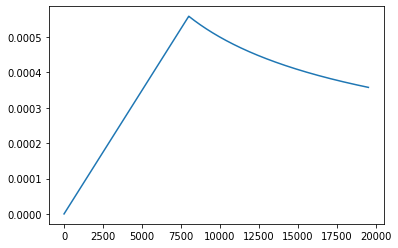

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR

def get_schedule(warmup_steps):
  def lr_schedule(step):
    return 1.0 * np.minimum(1.0, step / warmup_steps) / np.sqrt(np.maximum(step, warmup_steps))

  return lr_schedule

lr=0.05
weight_decay=0.1
warmup=8000

def training_setup():
  model = model_factory()
  criterion = nn.CrossEntropyLoss().cuda()
  optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
  schedule_func = get_schedule(warmup)
  scheduler = LambdaLR(optimizer, schedule_func)

  return model, criterion, optimizer, schedule_func, scheduler

_, _, _, schedule_func, _ = training_setup()

plt.plot([ lr * schedule_func(i) for i in range(len(train_dataset) // accumulation_steps * 25) ])

In [ ]:
import time

def save_model(model, optimizer, name='/content/drive/MyDrive/Work/Misc/lka-mini-base.tar'):
  torch.save({
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              }, name)

def progress_bar(len, total, current):
  current_scaled = int(round(len * current / total))

  s = '[' + '=' * (current_scaled - 1)
  s += '>' if current != total else '='
  s += '-' * (len - current_scaled) + ']'

  return s

def accuracy(model_output, labels):
  model_output = model_output.argmax(dim=-1)

  return (labels == model_output).float().mean().cpu().numpy()

def train_model(model, name, train_dataset, valid_dataset, optimizer, criterion, scheduler, accumulation_steps, epochs, epoch_len=None, eps = 1e-6, skip_eval=25):
  
  best_acc = 0.0

  bnum = math.ceil(len(train_dataset) / accumulation_steps)
  train_dataset = train_dataset.shuffle(len(train_dataset), reshuffle_each_iteration=True)

  times_repeat = epochs if epoch_len is None else math.ceil(epochs * epoch_len / bnum)
  train_dataset = train_dataset.repeat(times_repeat)
  train_datagen = iter(train_dataset)
  
  if epoch_len is not None:
    bnum = epoch_len
  
  for epoch in range(epochs):  # loop over the dataset multiple times

      #epoch start timestamp
      t = time.time()

      running_loss = 0.0
      running_reg  = 0.0
      running_acc  = 0.0

      running_momentum = 0.99

      epoch_loss = [  ]
      epoch_reg  = [  ]
      epoch_acc  = [  ]

      model.train()

      print(f'Epoch {epoch}')

      process_inputs = lambda x: torch.Tensor(x.numpy()).to(torch.int64)

      for i in range(bnum):
          # zero the parameter gradients
          optimizer.zero_grad()

          #accumulate gradients for a certain amount of steps
          for k in range(accumulation_steps):
            # get the inputs; data is a list of [inputs, labels]

            try:
              data = next(train_datagen)
            except:
              break
            inputs, labels = data['inputs'], data['targets']
            inputs, labels = process_inputs(inputs), process_inputs(labels)
            inputs, labels = inputs.cuda(), labels.cuda()

            # forward + backward + optimize
            outputs, additional_losses = model(inputs)
            loss = criterion(outputs + eps, labels)

            additional_losses = sum(additional_losses) if additional_losses else torch.Tensor([ 0.0 ]).cuda()
            ((loss + additional_losses) / accumulation_steps).backward()

            acc = accuracy(outputs, labels)

            running_loss = running_loss * running_momentum + (1 - running_momentum) * loss.item()
            running_loss_unb = running_loss / (1 - running_momentum ** (i * accumulation_steps + k + 1))

            running_acc  = running_acc  * running_momentum + (1 - running_momentum) * acc
            running_acc_unb = running_acc / (1 - running_momentum ** (i * accumulation_steps + k + 1))

            running_reg  = running_reg  * running_momentum + (1 - running_momentum) * additional_losses.item()
            running_reg_unb = running_reg / (1 - running_momentum ** (i * accumulation_steps + k + 1))

            epoch_loss.append(loss.item())
            epoch_acc.append(acc)
            epoch_reg.append(additional_losses.item())

          optimizer.step()

          pbar = progress_bar(20, bnum, i + 1)

          print(f'\r{pbar} {i + 1}/{bnum}:', end='')
          print(f' - running_loss: {running_loss_unb:.4f} - running_reg: {running_reg_unb:.6f} - running_acc: {running_acc_unb:.4f} - lr: {scheduler.get_last_lr()[0]:.5f}', end='')

          scheduler.step()
      
      epoch_loss = np.mean(epoch_loss)
      epoch_acc  = np.mean(epoch_acc)
      epoch_reg  = np.mean(epoch_reg)
      
      print(f' - epoch_loss: {epoch_loss:.4f} - epoch_reg: {epoch_reg:.6f} - epoch_acc: {epoch_acc:.4f}', end='')

      epoch_loss, epoch_acc, epoch_reg = [], [], []

      
      if epoch >= skip_eval:
        model.eval()
        valid_dataset.repeat()

        with torch.no_grad():
          for i, data in enumerate(iter(valid_dataset)):
            inputs, labels = data['inputs'], data['targets']
            inputs, labels = process_inputs(inputs), process_inputs(labels)
            inputs, labels = inputs.cuda(), labels.cuda()

            outputs, aux_losses = model(inputs)
            loss = criterion(outputs, labels)
            acc = accuracy(outputs, labels)
            aux_losses = sum(aux_losses) if aux_losses else torch.Tensor([ 0.0 ]).cuda()

            epoch_loss.append(loss.item())
            epoch_acc.append(acc)
            epoch_reg.append(aux_losses.item())

        epoch_loss, epoch_acc, epoch_reg = np.mean(epoch_loss), np.mean(epoch_acc), np.mean(epoch_reg)

        if epoch_acc > best_acc:
          best_acc = epoch_acc
          save_model(model, optimizer, name)
      
      else:
        epoch_loss, epoch_acc, epoch_reg = 0.0, 0.0, 0.0

      #epoch computing time
      t = time.time() - t

      print(f' - valid_loss: {epoch_loss:.4f} - valid_reg: {epoch_reg:.6f} - valid_acc: {epoch_acc:.4f} - epoch_time: {t:.4f} s')
 
  checkpoint = torch.load(name)
  return checkpoint

In [ ]:
def test(model, criterion, test_dataset):
  epoch_loss, epoch_acc, epoch_reg = [], [], []

  model.eval()
  test_dataset.repeat()

  process_inputs = lambda x: torch.Tensor(x.numpy()).to(torch.int64)

  t = time.time()

  with torch.no_grad():
    for i, data in enumerate(iter(test_dataset)):
      inputs, labels = data['inputs'], data['targets']
      inputs, labels = process_inputs(inputs), process_inputs(labels)
      inputs, labels = inputs.cuda(), labels.cuda()

      outputs, aux_losses = model(inputs)
      loss = criterion(outputs, labels)
      acc = accuracy(outputs, labels)
      aux_losses = sum(aux_losses) if aux_losses else torch.Tensor([ 0.0 ]).cuda()

      epoch_loss.append(loss.item())
      epoch_acc.append(acc)
      epoch_reg.append(aux_losses.item())

  t = time.time() - t

  epoch_loss, epoch_acc, epoch_reg = np.mean(epoch_loss), np.mean(epoch_acc), np.mean(epoch_reg)

  print(f' - test_loss: {epoch_loss:.4f} - test_reg: {epoch_reg:.6f} - test_acc: {epoch_acc:.4f} - test_time: {t:.4f} s')
  return epoch_loss, epoch_reg, epoch_acc

In [10]:
test_accuracy = [  ]

for i in range(1): ####!!!!!!!!!!!!!!
  path = 'model_to_test_' + str(i) + '.b'

  model, criterion, optimizer, schedule_func, scheduler = training_setup()

  checkpoint = train_model(model, path, train_dataset, valid_dataset, optimizer, criterion, scheduler, accumulation_steps, 100, 200, skip_eval=15)
  model.load_state_dict(checkpoint['model_state_dict'])
  
  _, _, acc = test(model, criterion, test_dataset)
  test_accuracy.append(acc)

test_accuracy = np.mean(test_accuracy)

print(f'\nTotal accuracy: {test_accuracy:.4f}')

Original model 4514818 params, new model 4251650 params, ratio 0.942
Epoch 0
[====================] 200/200: - running_loss: 0.6949 - running_reg: 0.000000 - running_acc: 0.5131 - lr: 0.00001 - epoch_loss: 0.6949 - epoch_reg: 0.000000 - epoch_acc: 0.5134 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 75.8237 s
Epoch 1
[====================] 200/200: - running_loss: 0.6918 - running_reg: 0.000000 - running_acc: 0.5302 - lr: 0.00003 - epoch_loss: 0.6938 - epoch_reg: 0.000000 - epoch_acc: 0.5239 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 64.1615 s
Epoch 2
[====================] 200/200: - running_loss: 0.6870 - running_reg: 0.000000 - running_acc: 0.5378 - lr: 0.00004 - epoch_loss: 0.6898 - epoch_reg: 0.000000 - epoch_acc: 0.5300 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 64.4095 s
Epoch 3
[====================] 200/200: - running_loss: 0.6812 - running_reg: 0.000000 - running_acc: 0.5654 - l

In [ ]:
Simple: 6654, 6675, 6651, 6669, 6657

In [ ]:
3 x AOGLU l=0.0: 0.6610, 0.6571, 0.6601, 0.6568, 0.6622

In [ ]:
FFN l=0.005: 0.6585, 0.6530, 0.6589, 0.6601, 0.6594

In [ ]:
FFN noorth: 0.6582, 0.6456, 0.6605, 0.6591, 0.5521, | 0.6580, 0.6530

In [ ]:
2 x OGLU l=0.1: 0.6596, 0.6591, 0.6578, 0.6635, 0.6601

In [ ]:
2 x OGLU l=0.01:0.6639, 0.6594, 0.6591, 0.6586, 0.6625

In [ ]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output[0].detach()
    return hook

process_inputs = lambda x: torch.Tensor(x.numpy()).to(torch.int64)

list(model.blocks[-1].attention.lka.modules())[0][0].register_forward_hook(get_activation('1'))
#list(model.blocks[-1].attention.lka.modules())[0][1].register_forward_hook(get_activation('2'))

In [ ]:
model(process_inputs(next(iter(train_dataset))['inputs']).cuda())
activation

{'1': tensor([[[[0.4846, 0.6129, 1.0817,  ..., 0.8458, 0.8182, 0.6113],
           [0.6741, 1.0226, 0.9306,  ..., 0.6382, 0.4864, 0.4956],
           [0.7144, 0.7925, 0.9776,  ..., 0.8392, 0.8342, 0.6923],
           ...,
           [0.6351, 0.4956, 0.8323,  ..., 1.1306, 0.8587, 0.7959],
           [0.6259, 1.0617, 0.9905,  ..., 0.7249, 0.8088, 0.8153],
           [0.7734, 0.8578, 0.5455,  ..., 0.5648, 0.7239, 0.6971]],
 
          [[1.1219, 0.8068, 0.7288,  ..., 0.5271, 1.1042, 0.6128],
           [0.8955, 0.9000, 1.3224,  ..., 0.5096, 0.5674, 1.1289],
           [0.7283, 0.8557, 0.4822,  ..., 0.8176, 0.3683, 0.6196],
           ...,
           [0.6962, 0.6160, 0.4413,  ..., 1.0298, 0.8417, 0.8641],
           [1.0189, 0.9670, 0.5587,  ..., 0.9078, 0.7291, 0.7901],
           [0.6431, 0.5184, 0.5831,  ..., 0.6299, 0.6459, 0.6050]],
 
          [[0.6520, 0.8644, 0.8144,  ..., 0.5583, 0.4932, 0.5764],
           [0.3789, 0.7886, 0.5084,  ..., 0.7604, 0.5583, 0.4504],
           [0.8306,

In [ ]:
model, criterion, _, _, _ = training_setup()
tmp = next(iter(train_dataset))
outputs, aux_losses = model(process_inputs(tmp['inputs']).cuda())

aux_losses = sum(aux_losses)
(criterion(outputs, process_inputs(tmp['targets']).cuda()) + aux_losses).backward()

Original model 3464194 params, new model 3663874 params, ratio 1.06


In [ ]:
list(model.blocks[-1].attention.lka.modules())[0][0].output_bias

Parameter containing:
tensor([[[[-2.6187e-03, -5.7948e-04, -3.2907e-04,  6.2941e-04, -7.1119e-04,
           -4.3961e-04,  2.6415e-03,  9.3061e-04,  2.9606e-03, -2.6636e-04,
           -1.7387e-03,  1.6021e-03,  9.3624e-04,  1.1273e-03, -3.3982e-04,
           -4.0739e-04, -2.0149e-03,  9.0991e-04, -1.0498e-03, -2.7959e-03,
            2.5112e-04, -9.3633e-04,  6.2485e-04, -1.3612e-03, -2.9829e-04,
           -2.0080e-04,  7.8189e-04,  7.8589e-04, -5.3443e-03, -3.7092e-03,
           -2.3028e-04,  3.1588e-03, -2.2930e-04,  3.9736e-03,  4.0218e-04,
            1.0651e-03,  7.7839e-03,  1.8654e-04, -3.1373e-03,  1.4372e-03,
            4.1014e-03, -1.0334e-03, -8.9334e-04, -2.3530e-04, -1.0687e-03,
           -2.1504e-03, -1.1092e-03,  1.7172e-05,  1.2050e-03, -1.5283e-03,
            1.4103e-04, -2.1979e-03, -5.9292e-05,  2.5531e-03, -4.6291e-03,
            8.9993e-04,  5.3557e-05, -1.8944e-03,  6.1842e-04, -3.0434e-03,
           -2.6042e-03, -2.7910e-03,  1.9914e-03,  3.3585e-03]],

